<a href="https://colab.research.google.com/github/Amulyanrao7777/ML/blob/main/baggingdandrandomforests_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bagging and Random Forests

- Problem: Predict whether a student Passes (1) or Fails (0) based on Study Hours and Attendance (%)

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



##### Step(1) Generate simple classification dataset

In [ ]:
# Create dataset
data = {
    "Study_Hours": [1, 2, 3, 4, 5, 6],
    "Attendance": [60, 65, 70, 75, 80, 85],
    "Result": [0, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
print(df)


   Study_Hours  Attendance  Result
0            1          60       0
1            2          65       0
2            3          70       0
3            4          75       1
4            5          80       1
5            6          85       1


##### Step(2) Splitting Features and Target

In [ ]:
X = df[["Study_Hours", "Attendance"]]
y = df["Result"]

##### Step(3) Bagging Using Decision Trees
- Multiple decision trees

- Trained on bootstrap samples

- Final prediction by majority vote

In [ ]:
# Base model
base_tree = DecisionTreeClassifier()

# Bagging classifier
bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train model
bagging_model.fit(X, y)


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

##### Step(4) Prediction

In [ ]:
# New student data
new_student = [[3.5, 72]]  # Study hours = 3.5, Attendance = 72%

prediction = bagging_model.predict(new_student)
print("Bagging Prediction:", "Pass" if prediction[0] == 1 else "Fail")


Bagging Prediction: Fail


#### Step(5) Random Forest Classifier
- Bagging + random feature selection at each split

- Less correlated trees

- Better generalization

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=10,
    random_state=42
)

# Train Random Forest
rf_model.fit(X, y)


RandomForestClassifier(n_estimators=10, random_state=42)

##### Step(6) Prediction

In [ ]:
rf_prediction = rf_model.predict(new_student)
print("Random Forest Prediction:", "Pass" if rf_prediction[0] == 1 else "Fail")


Random Forest Prediction: Fail


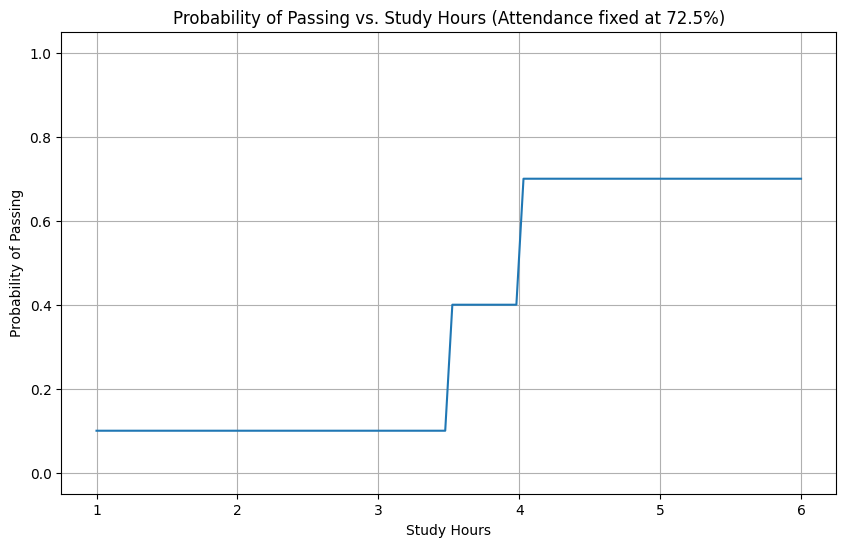

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a range of study hours for plotting
study_hours_range = np.linspace(df['Study_Hours'].min(), df['Study_Hours'].max(), 100).reshape(-1, 1)

# Fix attendance at the average value from the dataset
fixed_attendance = df['Attendance'].mean()
fixed_attendance_array = np.full_like(study_hours_range, fixed_attendance)

# Combine to create a new dataset for prediction
prediction_data = np.hstack((study_hours_range, fixed_attendance_array))

# Get probability of class 1 (Pass) using the trained Random Forest model
probabilities = rf_model.predict_proba(prediction_data)[:, 1]

plt.figure(figsize=(10, 6))
sns.lineplot(x=study_hours_range.flatten(), y=probabilities)
plt.title(f'Probability of Passing vs. Study Hours (Attendance fixed at {fixed_attendance:.1f}%)')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.ylim(-0.05, 1.05) # Ensure y-axis covers full probability range
plt.grid(True)
plt.show()